# Customizing Visualizations

Use **Code** cells to write and run any code you need to answer the question and **Markdown** cells to write out answers in words. After you are finished with the assignment, remember to download it as an **HTML file** and submit it in **ELMS**.

In [44]:
from requests import get

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Adjustments to Visualizations

Many times, we want to add more customizations to a visualization than just adding a title or labeling axes. This might include additional text or lines to clarify relationships, or changing the color scheme to make certain parts of the graph more clear. These can add to the visual appeal of the graph, but also add to the clarity and successful delivery of information. 

In this notebook, we will discuss some techniques to add features to graphs and make them look nicer while keeping in mind the elements that are key for a successful visualization. 

Let's start by bringing in some data that we can make plots with.

In [45]:
import yaml
with open('../../keys.yml', 'r') as file:
    keys = yaml.safe_load(file)
census_key = keys['census_api_key']

In [46]:
from acs_data import get_county_data
from acs_data import get_us_data

The `get_county_data` function (defined in `acs_data.py`) gets county-level data on characteristics like number of households, mean income, percent employed, percent with a bachelor's degree, and percent with a graduate degree. The `get_us_data` function does the same for the US as a whole (so there will be only one row). 

In [47]:
census_data = get_county_data(2022, census_key)
census_data.head()

,county,num_households,mean_income,percent_employed,percent_bachelors,percent_graduate,state
0,"Baldwin County, Alabama",98854.0,110518,58.2,33.5,13.2,Alabama
1,"Calhoun County, Alabama",45701.0,81886,56.4,21.1,6.4,Alabama
2,"Cullman County, Alabama",35966.0,90641,59.5,20.1,7.2,Alabama
3,"DeKalb County, Alabama",26459.0,73125,57.9,13.6,5.9,Alabama
4,"Elmore County, Alabama",34061.0,94754,61.3,22.5,9.2,Alabama


In [48]:
us_data = get_us_data(2022, census_key)
us_data

,US,num_households,mean_income,percent_employed,percent_bachelors,percent_graduate
0,United States,129870928,124663,63.5,35.7,14.0


## Styles

So far, we have just been using the default style for graphs. For example, if we create a quick graph, it might look like this.

<Axes: >

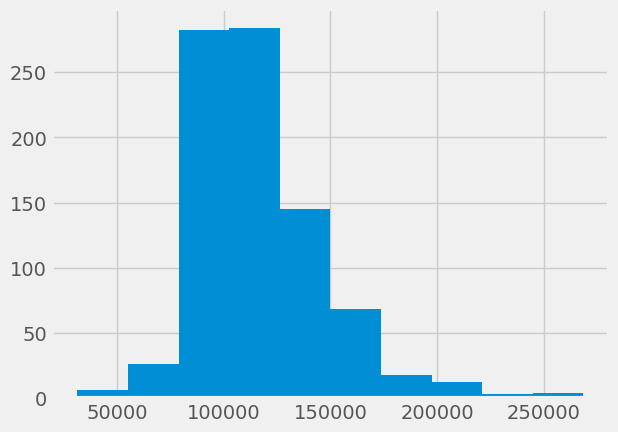

In [49]:
census_data.mean_income.hist()

One easy way to change the overall look of the graph is by trying out different styles. For example, you could use the default style used with ggplot, which is a visualization package first developed for R and is widely used. 

Text(0.5, 1.0, 'Mean Income for Counties in the US')

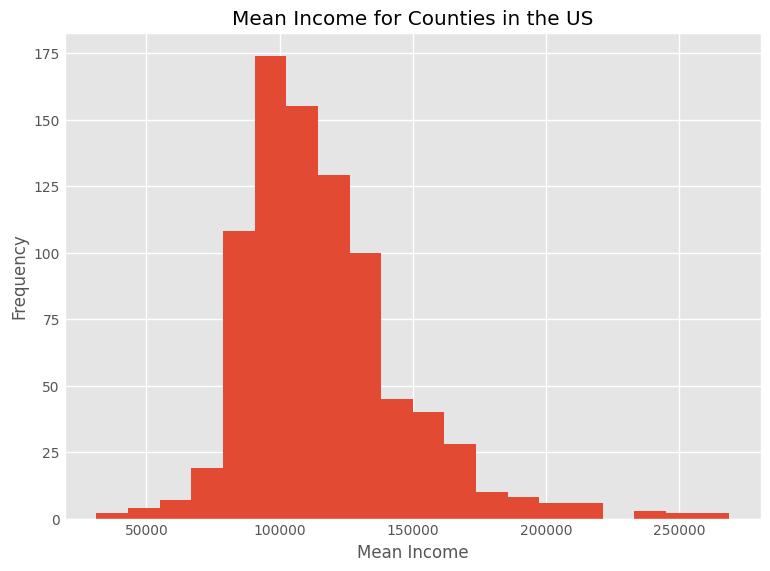

In [50]:
plt.style.use('ggplot')
fig, axes = plt.subplots(figsize=(8,6))
census_data.mean_income.hist(bins=20)
axes.set_xlabel("Mean Income")
axes.set_ylabel("Frequency")
axes.set_title("Mean Income for Counties in the US")

Alternatively, you could use the style used by FiveThirtyEight (https://fivethirtyeight.com/about-us/), which became popular for its use of graphics to show polling results as well as successful election predictions.

Text(0.5, 1.0, 'Mean Income for Counties in the US')

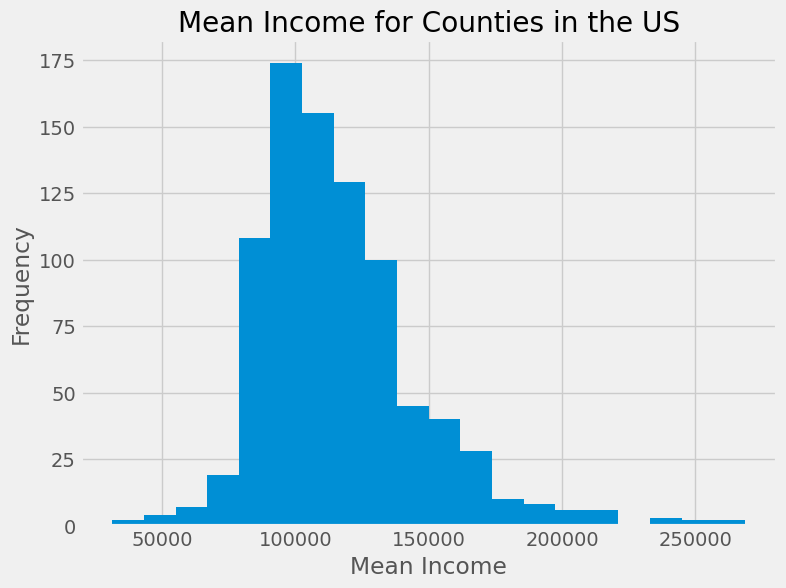

In [51]:
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(figsize=(8,6))
census_data.mean_income.hist(bins=20)
axes.set_xlabel("Mean Income")
axes.set_ylabel("Frequency")
axes.set_title("Mean Income for Counties in the US")

More plotting styles are provided in the matplotlib documentation here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

## Adding Lines

Suppose we wanted to show what the overall US mean income value was on this histogram. We could do this by adding a line and adding a note about what that line represents. The `axvline` function adds a vertical line by providing the x value that it should be at, as well as providing some specifications for what that line should look like. The `color` argument adjusts the color, while `ls` adjusts the type of line. Since we want to distinguish it from the bars on the graph, we use red to contrast from the blue and make it dashed instead of solid. 

In [52]:
us_mean_income = us_data.mean_income[0]

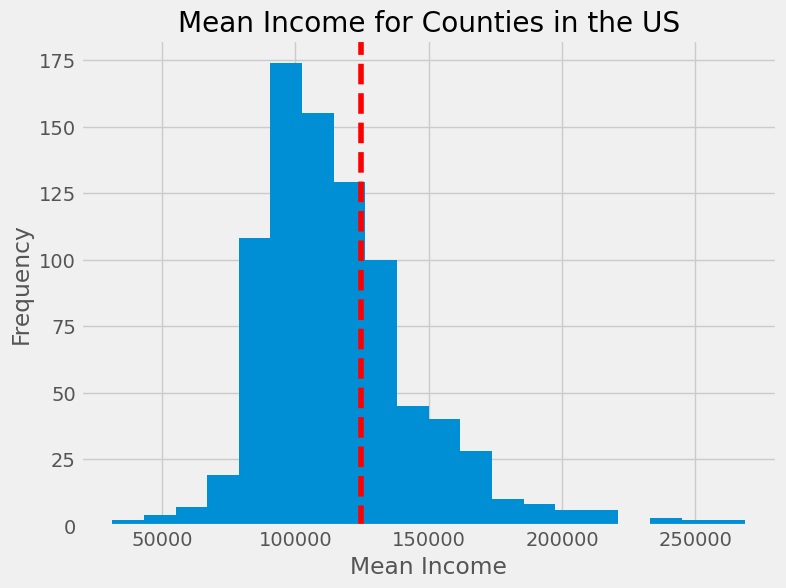

In [53]:
fig, axes = plt.subplots(figsize=(8,6))
census_data.mean_income.hist(bins=20)
axes.set_xlabel("Mean Income")
axes.set_ylabel("Frequency")
axes.set_title("Mean Income for Counties in the US")
plt.axvline(x = us_mean_income, color = 'red', ls = '--')

### Adding Annotations

The line might be helpful in identifying where the mean income for the US overall might be, but we can't tell what the value is exactly. In order to make it clear where that line is, we can add an annotation with the exact value. We use the `annotate` method to add the annotation on the Axes object. In the example below, we use f-strings to construct the exact text we want to put on the graph and specify the location of the text using the data coordinates. We want it a little bit offset from the actual mean so that the text isn't right on the line, so we add `5000` to the x-value of the location, then put it sufficiently high up so that it isn't running into any bars. 

Note that we use a slightly fancy f-string here as well. The `{us_mean_income:,}` means that it should insert the value in `us_mean_income` while using commas for every three digits, similar to how it might be shown when writing numbers in English. This makes it easier to read on the graph.

Text(129663, 150, 'Mean Income for US: $124,663')

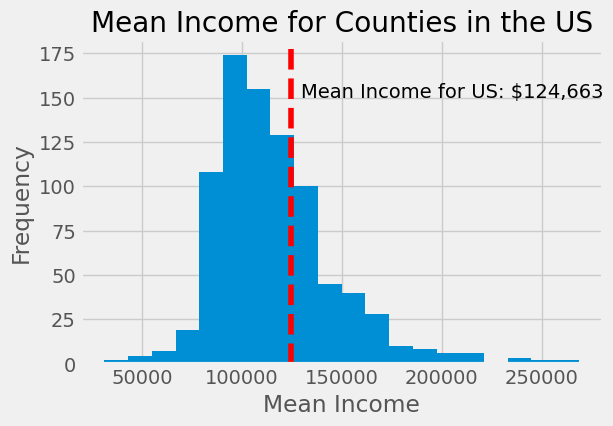

In [54]:
fig, axes = plt.subplots(figsize=(6,4))
census_data.mean_income.hist(bins=20)
axes.set_xlabel("Mean Income")
axes.set_ylabel("Frequency")
axes.set_title("Mean Income for Counties in the US")
plt.axvline(x = us_data.mean_income[0], color = 'red', ls = '--')
axes.annotate(f"Mean Income for US: ${us_mean_income:,}", 
              xy=(us_mean_income + 5000, 150), xycoords='data')

We also could have added the text using the figure coordinates by pixels or percentage of the full figure. For example, to add the text start halfway on the x-axis and 80% in height on the y-axis, we can use `xycoords = 'figure fraction'` with `xy=(0.5, 0.8)`. The `(0,0)` point is the bottom left, while `(1,1)` is on the top right. This might require a bit of fiddling around with the values to make sure it is in the right place.

Text(0.5, 0.8, 'Mean Income for US: $124,663')

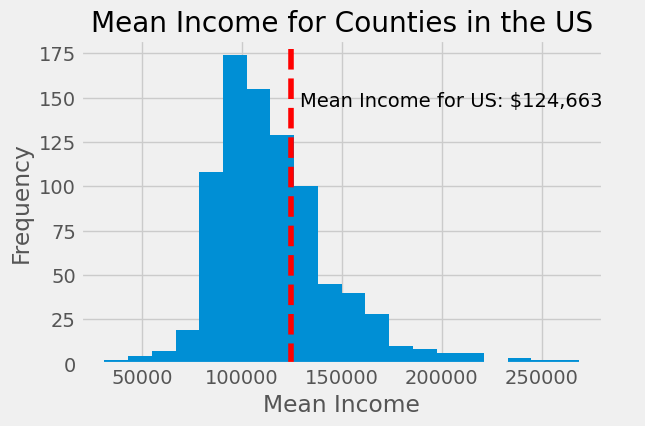

In [55]:
fig, axes = plt.subplots(figsize=(6,4))
census_data.mean_income.hist(bins=20)
axes.set_xlabel("Mean Income")
axes.set_ylabel("Frequency")
axes.set_title("Mean Income for Counties in the US")
plt.axvline(x = us_data.mean_income[0], color = 'red', ls = '--')
axes.annotate(f"Mean Income for US: ${us_mean_income:,}", 
              xy=(0.5, 0.8), xycoords='figure fraction')

We might want to make it a bit more clearer that this line represents the mean, too. That is, we might want to draw an arrow that indicates that the text is describing that line. To do this, we can add arguments to the `annotate` method to have it draw an arrow and give it where the arrow should be pointing. The `xy` argument indicates where on the graph the arrow should be pointing, and the `xytext` argument indicates where on the graph the text should be. An arrow will then be drawn from the text to the point in `xy`. 

Text(144663, 140, 'Mean Income for US: $124,663')

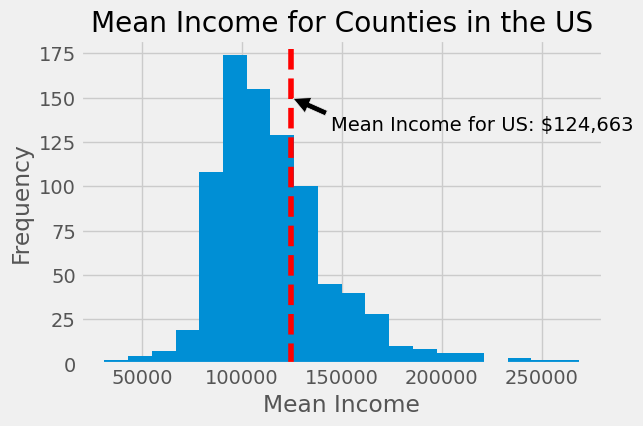

In [56]:
fig, axes = plt.subplots(figsize=(6,4))
census_data.mean_income.hist(bins=20)
axes.set_xlabel("Mean Income")
axes.set_ylabel("Frequency")
axes.set_title("Mean Income for Counties in the US")
plt.axvline(x = us_data.mean_income[0], color = 'red', ls = '--')
axes.annotate(f"Mean Income for US: ${us_mean_income:,}", 
              xy=(us_mean_income, 150), xycoords='data',
             xytext = (us_mean_income + 20000, 140), textcoords = 'data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='left', verticalalignment='top')

<font color ='red'>**Question 1: Consider the scatterplot shown below. Add an annotation to show the county name of the point with the highest percent of people with a bachelor's degree as well as the lowest percent of people with a bachelor's degree.**</font>

Text(0.5, 1.0, "Mean income by % Bachelor's in U.S. counties")

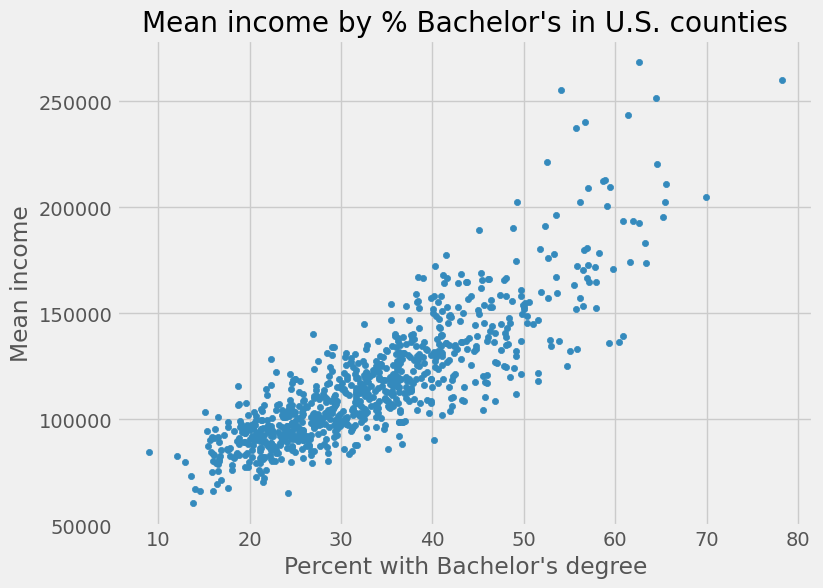

In [83]:
income_bachelors = census_data[['mean_income', 'percent_bachelors']]
fig, axes = plt.subplots(figsize=(8,6))
income_bachelors.plot.scatter(x='percent_bachelors', y='mean_income', ax=axes)
axes.set_xlabel("Percent with Bachelor's degree")
axes.set_ylabel("Mean income")
axes.set_title("Mean income by % Bachelor's in U.S. counties")

## Adjusting Categories 

Sometimes, when you make a graph with a categorical variables, the order of the categories gets mixed around and isn't really in a sensical order. This happens most often with **ordinal** variables, in which the values of the categorical variables are ordered in some way (for example, something like shirt size with small, medium, and large). 

Let's take a look at some categorical variables from the Pulse of the Nation dataset.

In [57]:
data_file = '201807-CAH_PulseOfTheNation_Raw.csv'
potn = pd.read_csv(data_file)
potn.head()

,gender,age,age_range,political_party,rep_change,dem_change,political_leaning,education,race,race_other,...,stereotypes,respect_for_authority,handout,climate_change,epa,biz_regulations,nuclear_emissions,voter_turnout_help,american_heartland,south_racist
0,Female,55,55-64,Independent,NaN,NaN,Moderate,Some college,White,NaN,...,Yes,Strongly Agree,Strongly Disagree,Well-informed,No,Yes,Yes,Help Democrats more,Yes,Yes
1,Female,34,25-34,Strong Democrat,NaN,No,Strong Liberal,Graduate degree,White,NaN,...,Yes,Strongly Disagree,Strongly Disagree,Well-informed,No,No,Yes,Help Democrats more,No,DK/REF
2,Male,49,45-54,DK/REF,NaN,NaN,Moderate,College degree,White,NaN,...,DK/REF,Strongly Agree,Somewhat Agree,Well-informed,No,No,Yes,DK/REF,Yes,No
3,Male,41,35-44,Independent,NaN,NaN,Strong Conservative,High school or less,White,NaN,...,Yes,Strongly Agree,Strongly Agree,Not Very Well-informed,Yes,Yes,DK/REF,Make no Difference,Yes,No
4,Female,65,65+,Independent,NaN,NaN,Moderate,Graduate degree,White,NaN,...,Yes,Somewhat Disagree,Somewhat Disagree,Well-informed,No,No,Yes,Help Democrats more,Yes,Yes


<Axes: ylabel='political_party'>

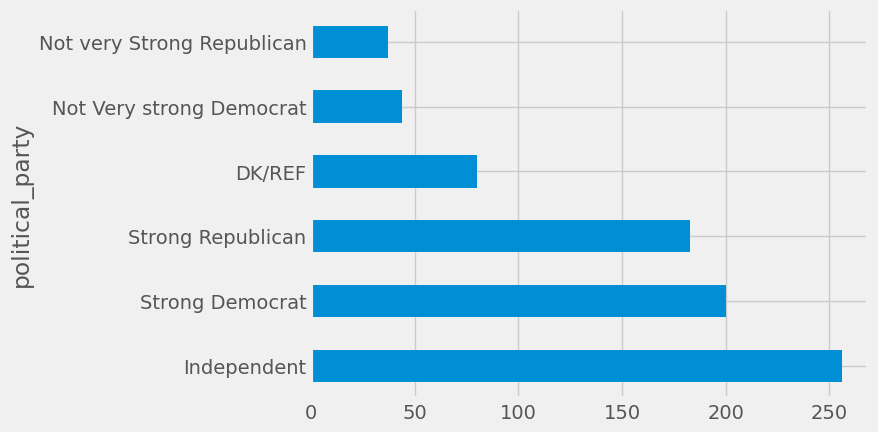

In [58]:
potn.political_party.value_counts().plot.barh()

This graph organizes the values in increasing order, but it can be a bit confusing to try to get an idea of the overall spectrum of political parties because the Republican and Democrat categories are all mixed up. In order to reorder these categories, we can convert the `political_party` column in our DataFrame to a `pd.Categorical` type and use our own ordering of the categories. This will enforce that ordering when the graph is made.



<Axes: ylabel='political_party'>

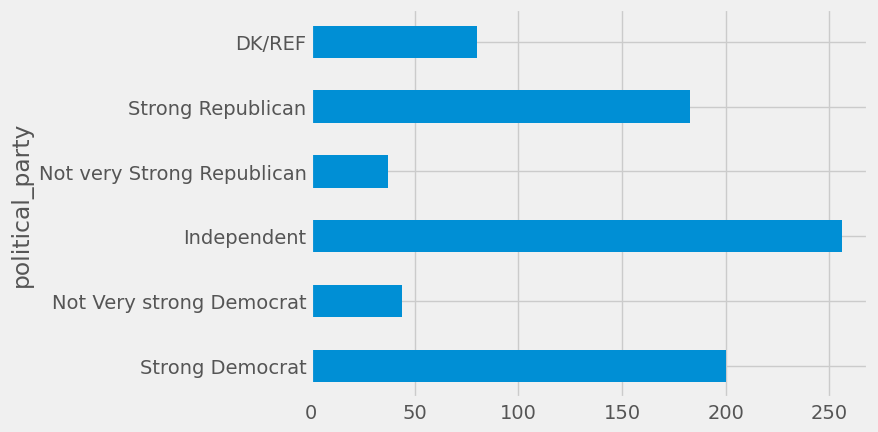

In [59]:
pol_parties = ['Strong Democrat', 'Not Very strong Democrat', 'Independent', 
               'Not very Strong Republican','Strong Republican',
              'DK/REF']
pd.Categorical(potn.political_party, categories = pol_parties)
potn.political_party.value_counts()[pol_parties].plot.barh()


<font color ='red'>**Question 2: Create a bar graph of the education level for the Pulse of the Nation dataset. Make sure it is in a reasonable order and be sure to include appropriate labels and a title for the plot**</font>

## Using colors

The plotting defaults typically provide colors that work well for a given graph. However, sometimes, you might want to adjust these colors to better represent the data. This is often pertinent when using an ordinal variable, especially for a variable like political party, where a standard color is associated with the groups (blue for Democrats, red for Republicans). The default colors might be misleading in these cases, so it would be good to set our own colors. Let's take a look at an example by comparing political party by gender in the Pulse of the Nation dataset.

Recall that we used `pd.crosstab` to look at comparisons of two categorical variables, with the `normalize` argument allowing us to get proportions rather than raw numbers.

In [21]:
party_by_gender = pd.crosstab(potn.gender,potn.political_party, normalize='index')

We will create a stacked bar chart so that we can look at the comparisons of proportions across genders. Note that since we used `normalize=index`, the overall length of all the bars should be 1.

<Axes: ylabel='gender'>

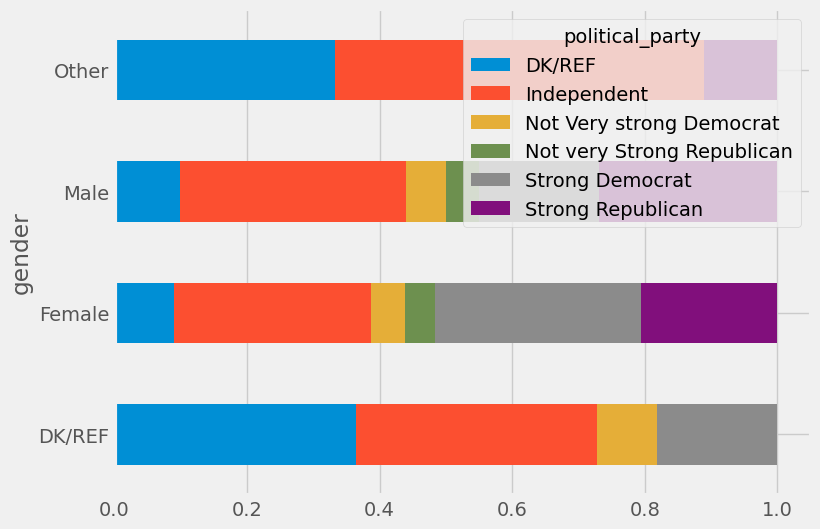

In [22]:
fig, axes = plt.subplots(figsize=(8,6))
party_by_gender.plot.barh(stacked = True, ax = axes)

There are a lot of things that we need to fix with this graph! First, as mentioned before, the colors are very confusing. Blue does not correspond to Democrats, nor does the color that is closest to red correspond to Republicans. In addition, we lost the ordering of the political parties when we used the `pd.crosstab` function. Finally, the legend is covering up part of the graph, making this harder to read.

Let's address each of these one by one. First, we will make sure that the order of the political parties is adjusted to match what we had used before, so that we have Independent in between the Democrats and Republicans, with DK/REF separated out. Then, we'll move the legend by using the `.legend()` method with the `bbox_to_anchor` argument providing a way for us to adjust the location. The `ncol = 3` argument makes it so that the categories are displaying more horizontal, saving space. 

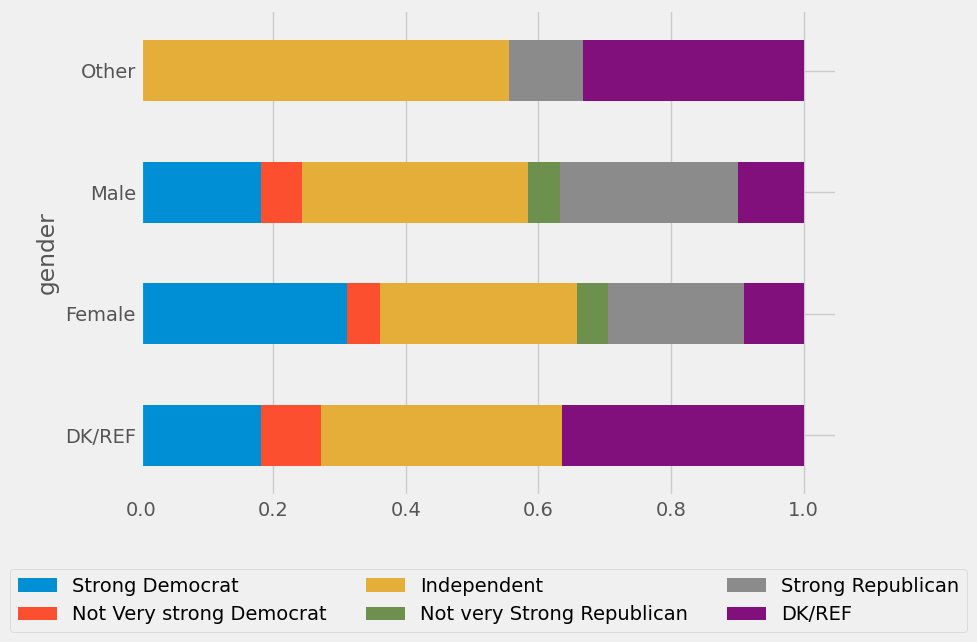

In [23]:
party_by_gender = party_by_gender.loc[:,pol_parties]

fig, axes = plt.subplots(figsize=(8,6))
party_by_gender.plot.barh(stacked = True, ax = axes)
axes.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol = 3)

We still have an issue with the colors. We'd like to adjust these to better represent the parties. To do this, we can use the `color` argument within `barh` so that we assign colors to the six categories. This can be done using a myriad of methods, such as specifying hex RGB values or using existing named colors. Here, we simply use the names, but you can check the matplotlib color section to see other ways of specifying colors here: https://matplotlib.org/stable/gallery/color/color_demo.html. 

A list of named colors can be found here: https://matplotlib.org/stable/gallery/color/named_colors.html.

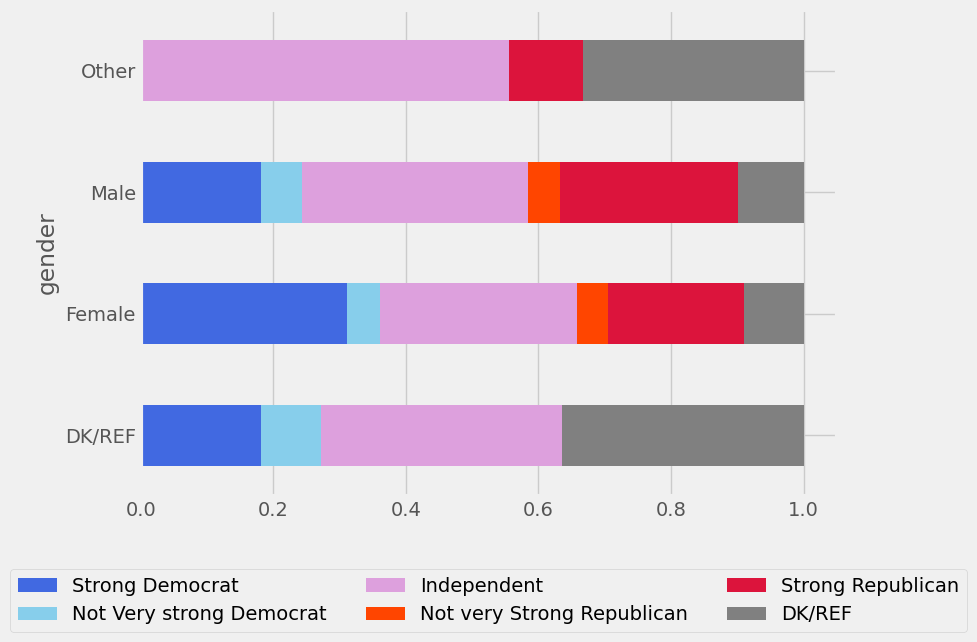

In [24]:
fig, axes = plt.subplots(figsize=(8,6))
party_by_gender.plot.barh(stacked = True, color = ['royalblue','skyblue', 'plum',
                                                    'orangered','crimson','gray'],
                         ax = axes)
axes.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol = 3)


We could have also used existing color maps from matplotlib to get some colors from a range. For example, we might want to use the blue-red-green range, and get some colors from the blue to red scale and set the "DK/REF" as green to separate it out from the political parties. 

For a list of colormaps, see https://matplotlib.org/stable/gallery/color/colormap_reference.html

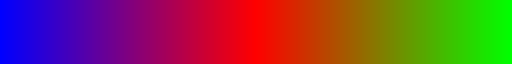

In [25]:
import matplotlib as mpl
cmap = mpl.colormaps['brg']
cmap

In [26]:
colors = cmap(np.linspace(0, 1, 11))
colors

array([[0.        , 0.        , 1.        , 1.        ],
       [0.19607843, 0.        , 0.80392157, 1.        ],
       [0.4       , 0.        , 0.6       , 1.        ],
       [0.59607843, 0.        , 0.40392157, 1.        ],
       [0.8       , 0.        , 0.2       , 1.        ],
       [0.99607843, 0.00392157, 0.        , 1.        ],
       [0.8       , 0.2       , 0.        , 1.        ],
       [0.59607843, 0.40392157, 0.        , 1.        ],
       [0.4       , 0.6       , 0.        , 1.        ],
       [0.19607843, 0.80392157, 0.        , 1.        ],
       [0.        , 1.        , 0.        , 1.        ]])

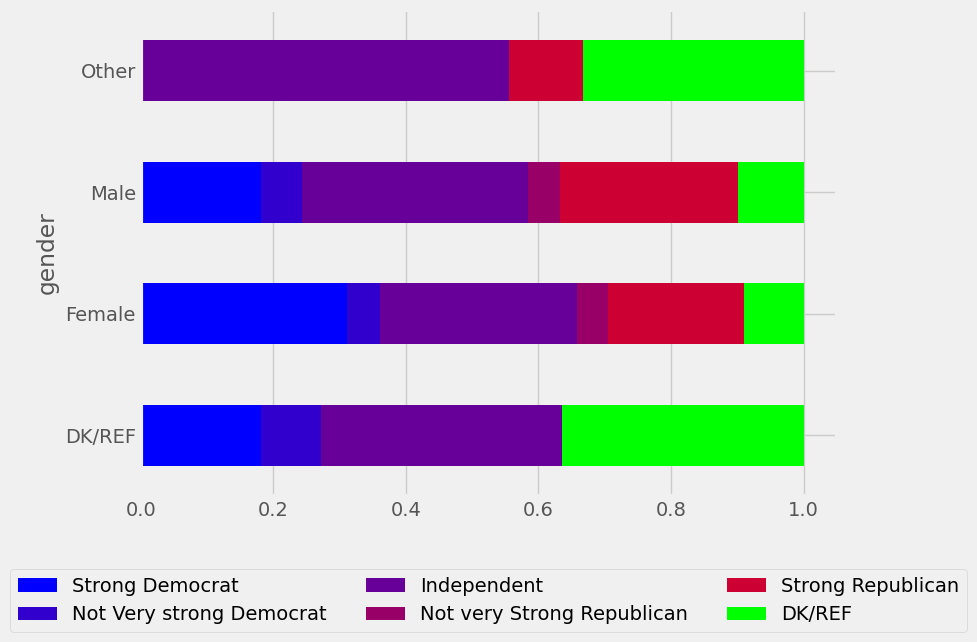

In [27]:
fig, axes = plt.subplots(figsize=(8,6))
party_by_gender.plot.barh(stacked = True, color = colors[[0,1,2,3,4,10]],
                         ax = axes)
axes.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol = 3)

<font color ='red'>**Question 3: Create a visualization that looks at the relationship between the `biz_regulations` variable and the `political_party` variable. Make sure you adjust colors and reorder variables as appropriate. Does it look like there is a relationship?**</font>

# Seaborn

While `matplotlib` can be very useful for creating graphs, it can be easy to get bogged down in all of the intricacies of customizing everything you want to do. In this section, we introduce a few other plotting libraries that you can use to make graphs. We only show a few examples of doing simple histograms and boxplots here, because there are lots and lots of possibilities for visualizations, so we don't want to spend too much time on going every single little detail here. Instead, these are meant to show a little bit about the syntax and style of the graphs that are produced so that you can learn more about them on your own if you'd like.


In [28]:
import seaborn as sns

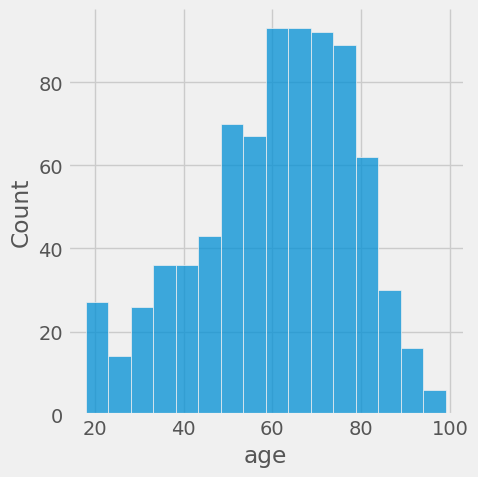

In [29]:
sns.displot(data = potn, x = 'age')

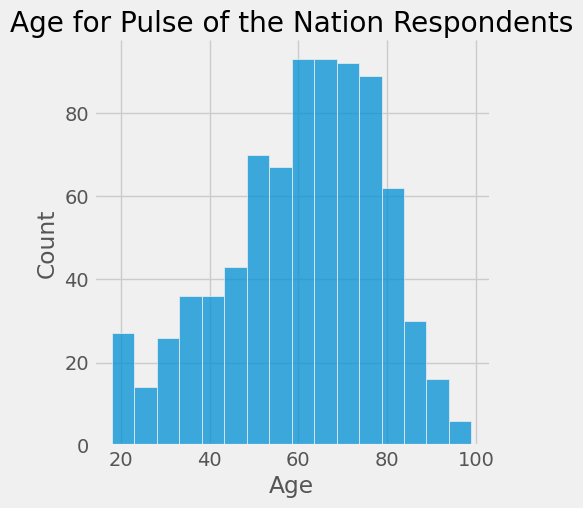

In [60]:
g = sns.displot(data = potn, x = 'age')
g.set(xlabel = 'Age', title = 'Age for Pulse of the Nation Respondents')
plt.xticks([20, 40, 60, 80, 100])
plt.show()

In seaborn, you can use figure-level functions (`relplot`, `displot`, or `catplot`) or axes-level functions (see subcategories below). 

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

Seaborn plots are particularly useful when we want to create comparisons across groups. For instance, if I wanted to see differences in age acrosss different levels of the `political_leaning` variable, I could just add the `political_leaning` variable as an argument to `hue`. 

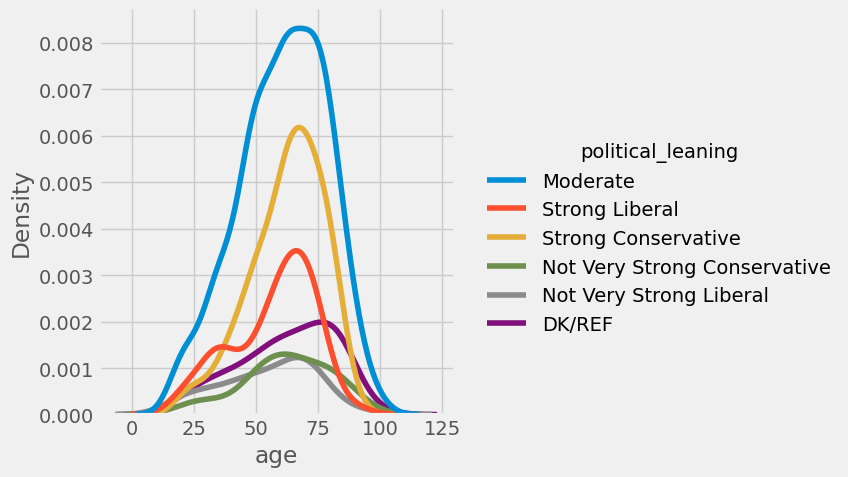

In [61]:
sns.displot(data = potn, x = 'age', hue = 'political_leaning', kind = 'kde')

Anything that you can do in Seaborn can also be done in matplot, but Seaborn has some sensible default settings that allow you to make complicated plots with a lot less code. Here, I'm creating a plot that shows age across levels of party ID and gender. 

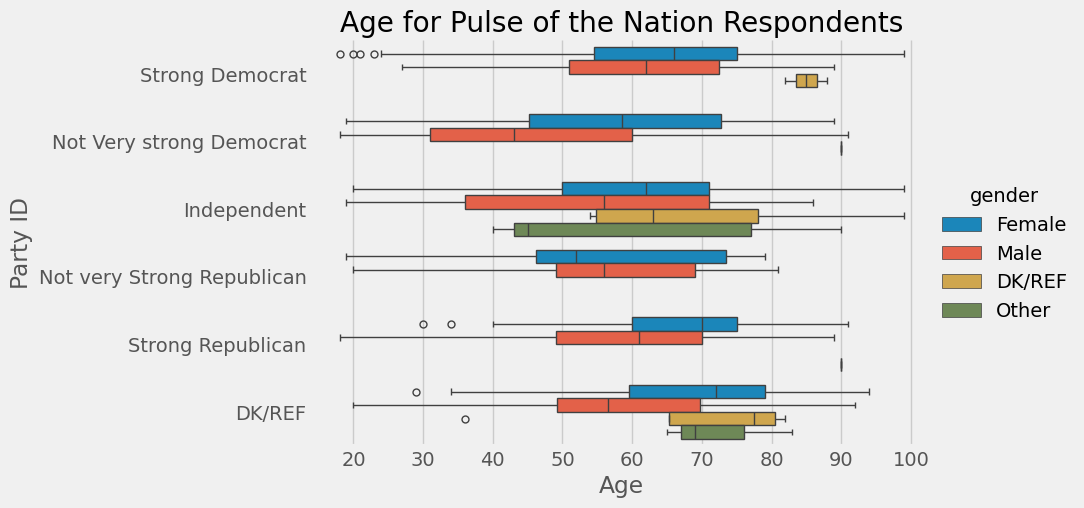

In [62]:
pol_parties = ['Strong Democrat', 'Not Very strong Democrat', 'Independent', 
               'Not very Strong Republican','Strong Republican', 'DK/REF']
# using aspect = to control the plot width (higher values make it wider, lower values make it taller)
g=sns.catplot(data = potn, x = 'age', y = 'political_party',hue = 'gender', order = pol_parties, kind = 'box', aspect=2)
g.set(xlabel = 'Age', ylabel='Party ID',  title = 'Age for Pulse of the Nation Respondents')


Moreover, Seaborn makes it relatively easy to create faceted plots that show relationships separately across multiple groups. 

In [63]:
md_va = census_data[(census_data.state == 'Maryland') | (census_data.state == 'Virginia')]


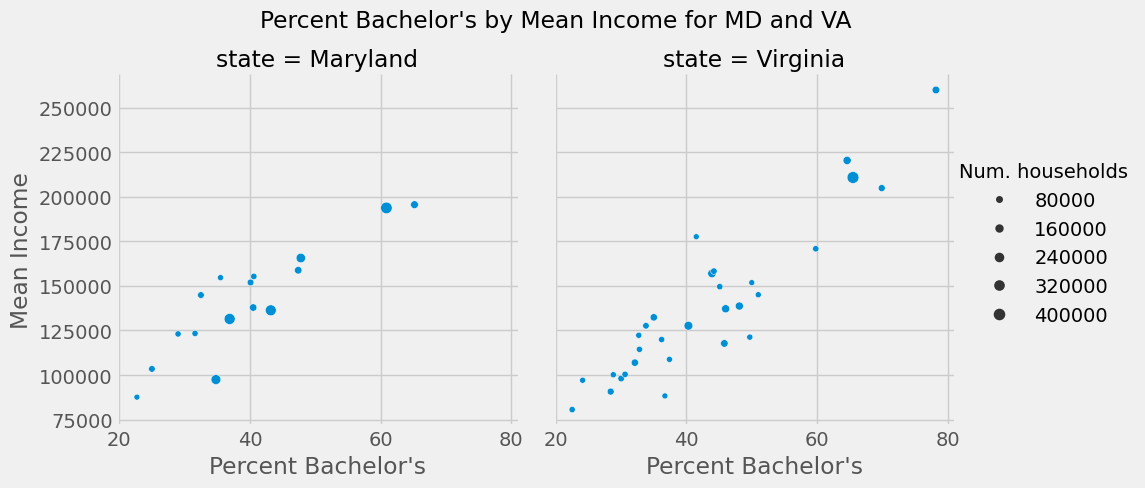

In [64]:
g = sns.relplot(
    data=md_va,
    x="percent_bachelors", y="mean_income", col="state",
    size="num_households"
)

# Set axis labels
g.set_axis_labels("Percent Bachelor's", "Mean Income")

# Add overall Title
g.figure.subplots_adjust(top=.85)
g.figure.suptitle("Percent Bachelor's by Mean Income for MD and VA")
g._legend.set_title('Num. households')

Or create plots with a regression model:

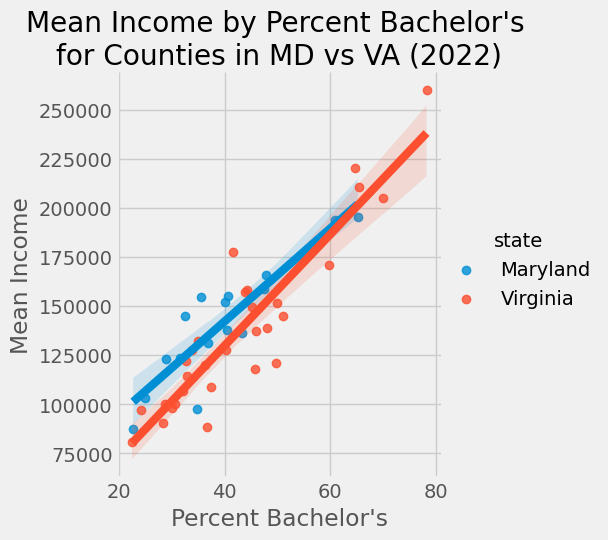

In [65]:
g = sns.lmplot(
    data = md_va,
    x = "percent_bachelors", y = "mean_income",
    hue = "state"
)
g.set(xlabel = "Percent Bachelor's", ylabel = "Mean Income", 
      title = "Mean Income by Percent Bachelor's \nfor Counties in MD vs VA (2022)")

Or show the relationship between multiple numeric variables in a single plot

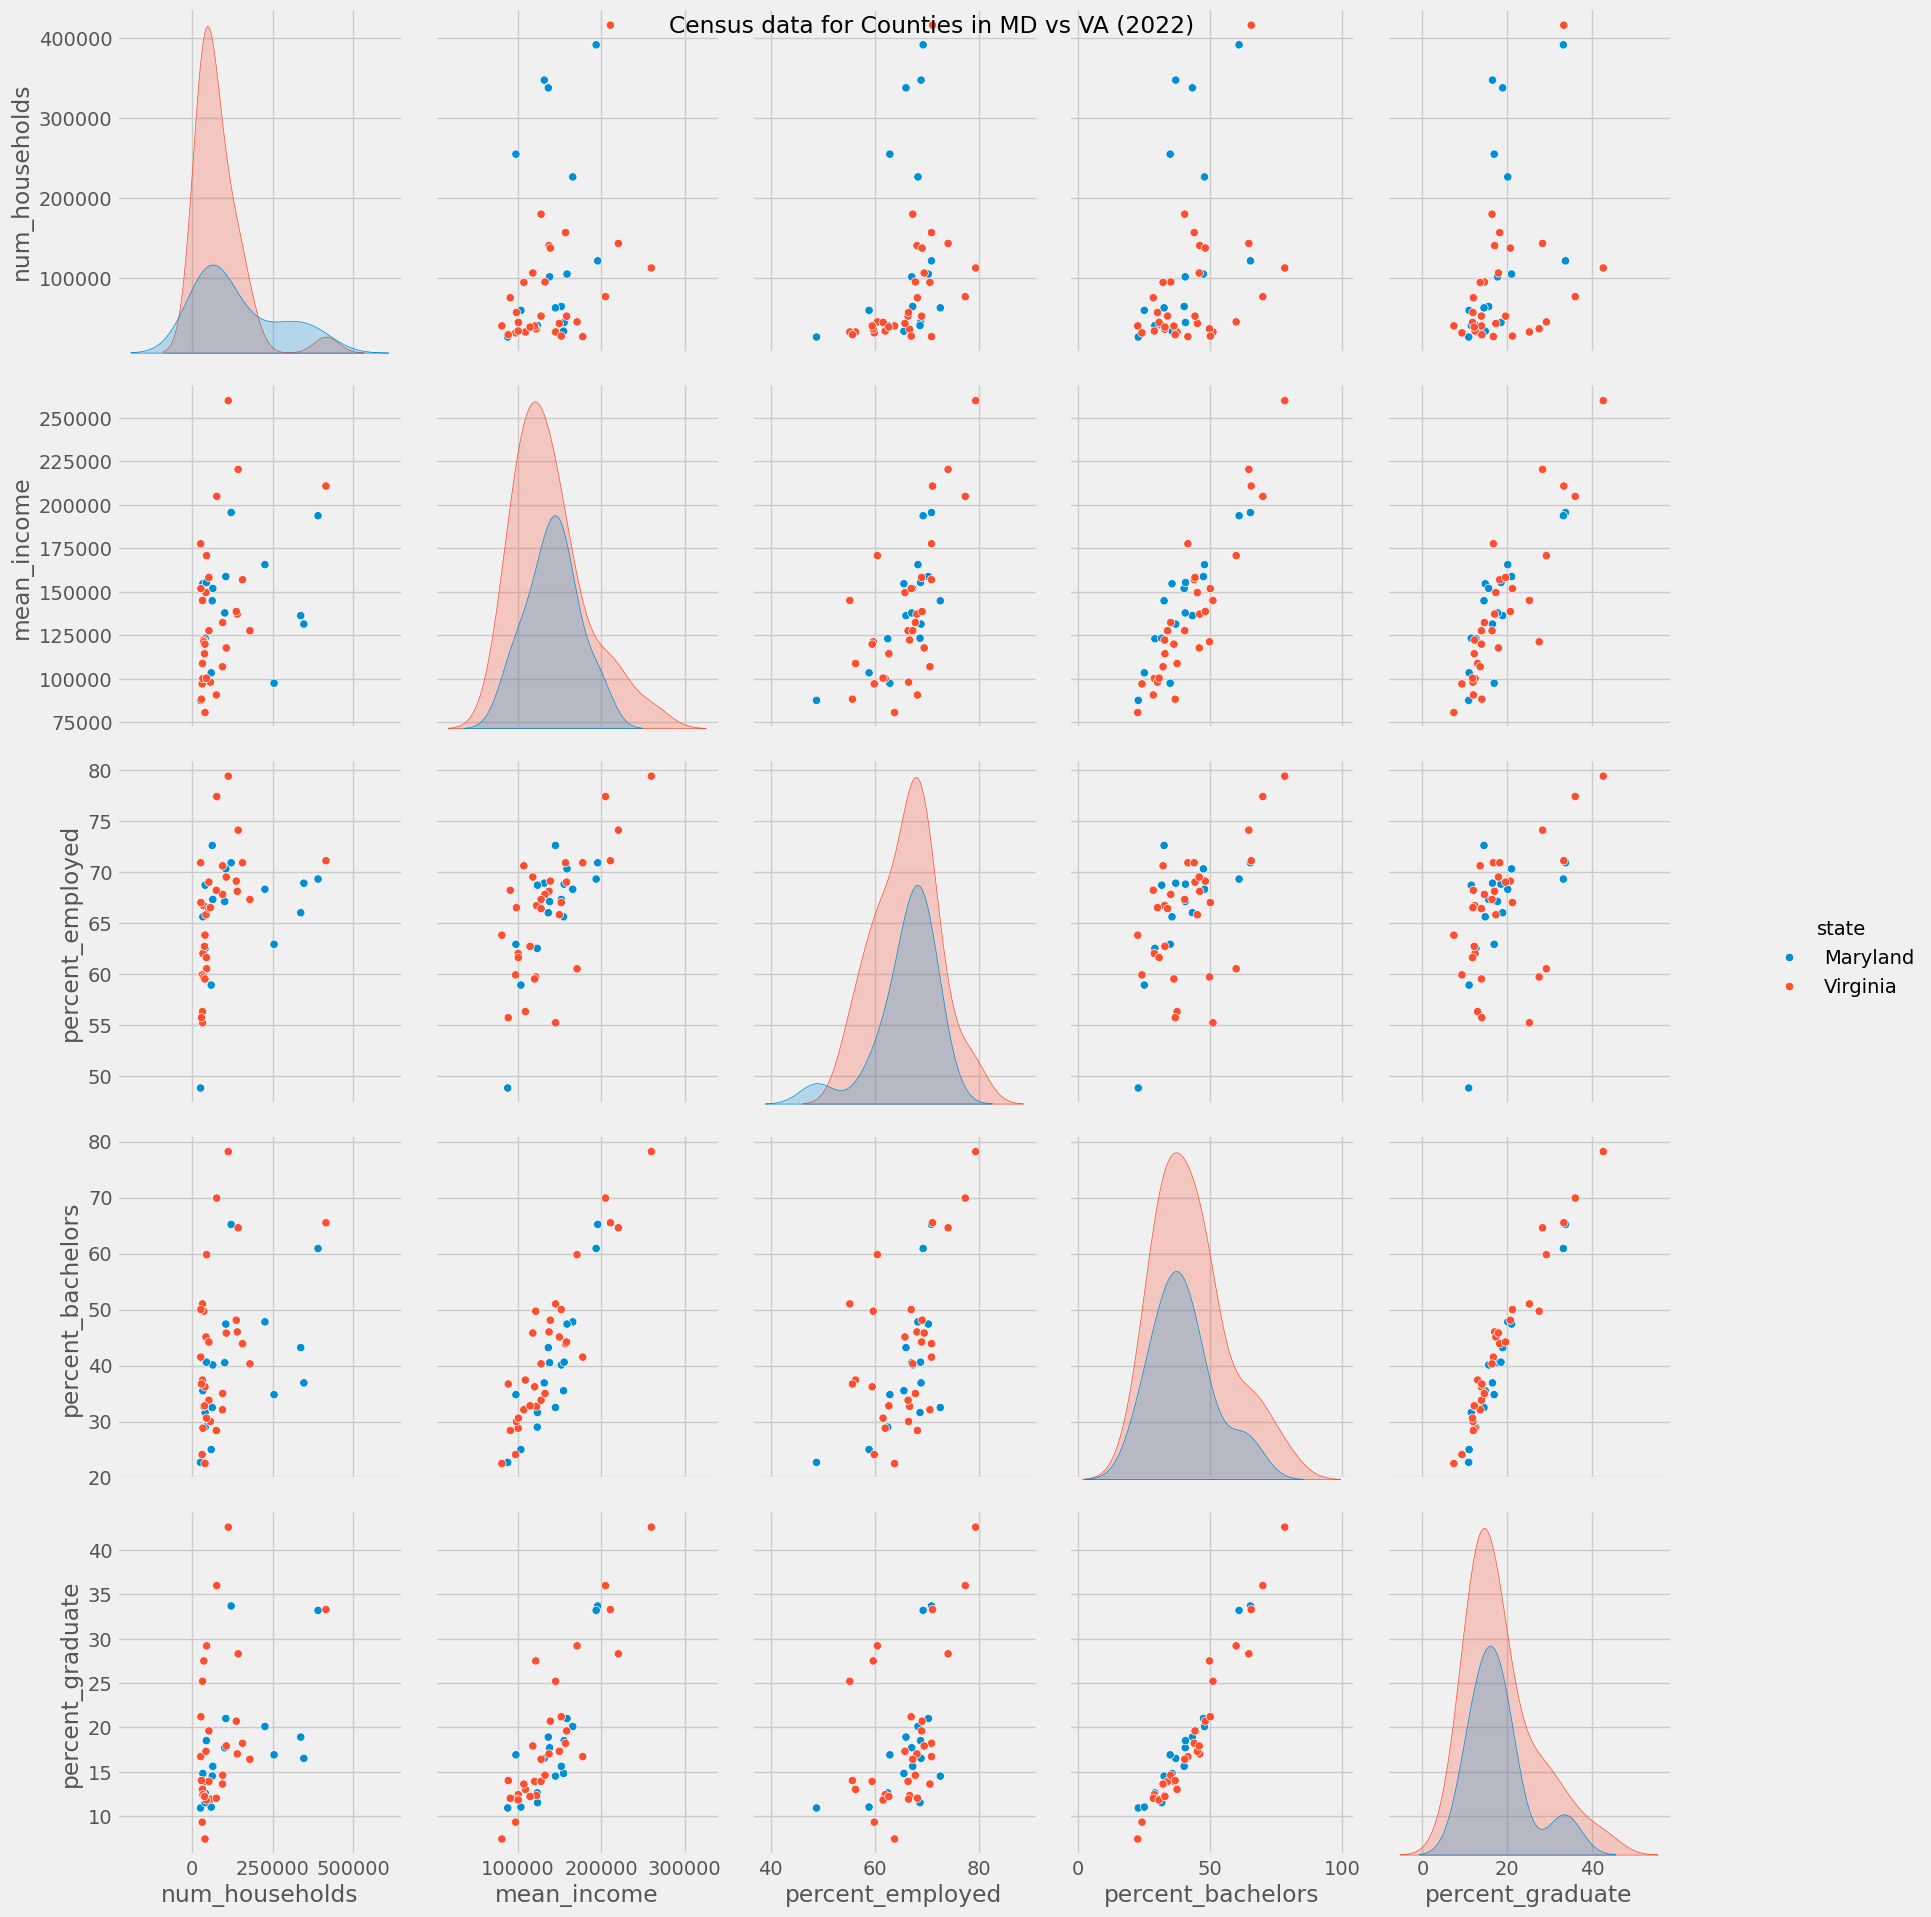

In [80]:
g = sns.pairplot(md_va, hue='state')
g.figure.set_size_inches(20, 20)
g.figure.suptitle( "Census data for Counties in MD vs VA (2022)")
plt.show()
